<h2 style="text-align: center;"><span style="color: #333399;">Lab Course: Distributed Data Analytics</span><br /><span style="color: #333399;">Exercise Sheet 5</span></h2>
<h3 style="text-align: center;"><span style="color: #333399;">Syed Wasif Murtaza Jafri- 311226</span></h3>

## Exercise 1.2: Basic Hadoop operations

1. Check Hadoop version: hadoop version.
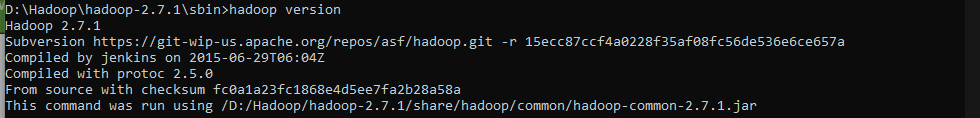

2. List files in HDFS: hadoop fs -ls /
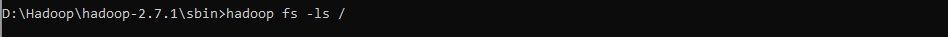

3. Create a hadoopdemo directory: hadoop fs -mkdir /hadoopdemo
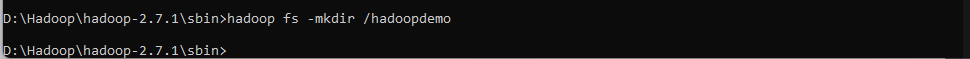

4. Create several sub-directories nested in hadoopdemo, e.g. text files, raw data
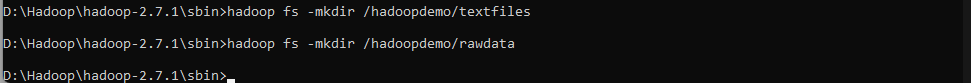

5. Transfer and store a data file from local systems to Hadoop:hadoop fs -put file.txt /hadoopdemo/text files
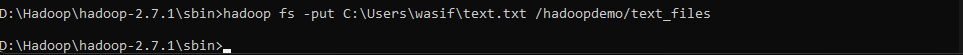
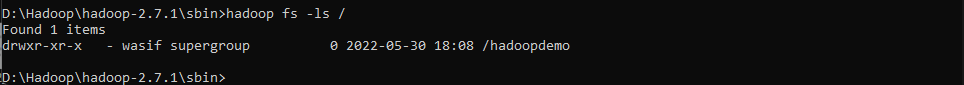

6. Check directories and files using Hadoop User Interface
http://localhost:50070 > Utilities > Browse the file system.
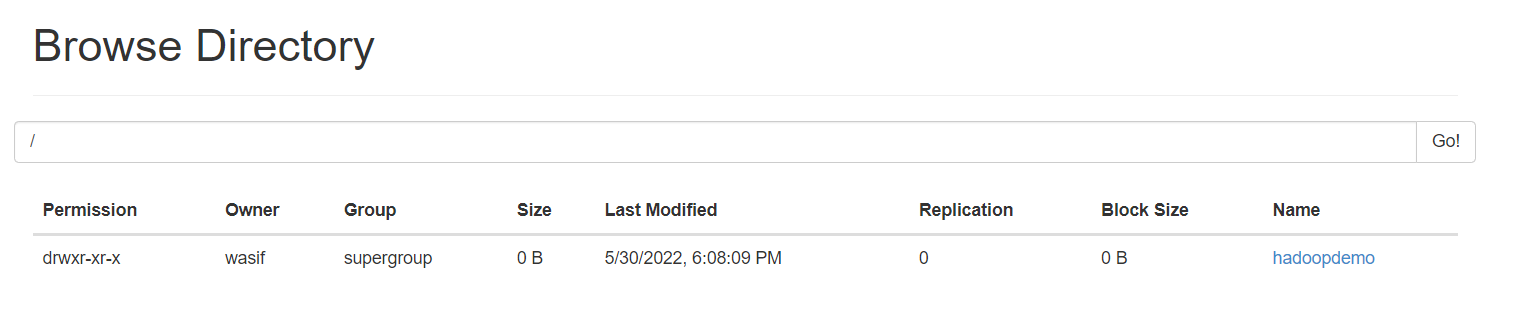

7. Remove the sub-directory hadoop fs -rm -r /hadoopdemo/text files
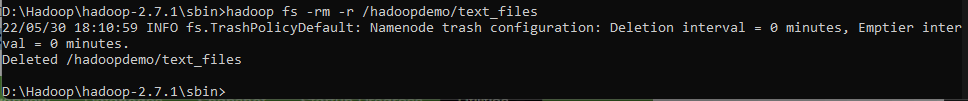

8. Change the content of file.txt in the local system and overwrite it in Hadoop 
hadoop fs -put -f file.txt /hadoopdemo/text files
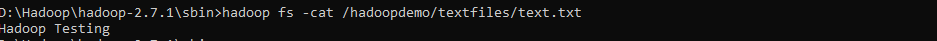
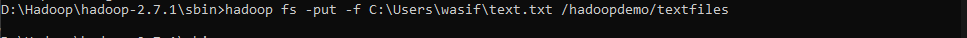

9. Read the content of the file: hadoop fs -cat /hadoopdemo/text files/file.txt
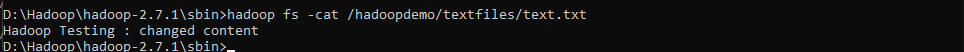

### Exercise 1.3: WordCount MapReduce example
Making input output directories on Hdfs and puting input file
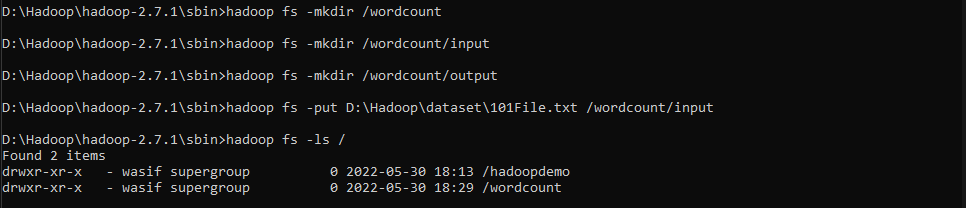


##### Running the wordcounter example shipped with hadoop.
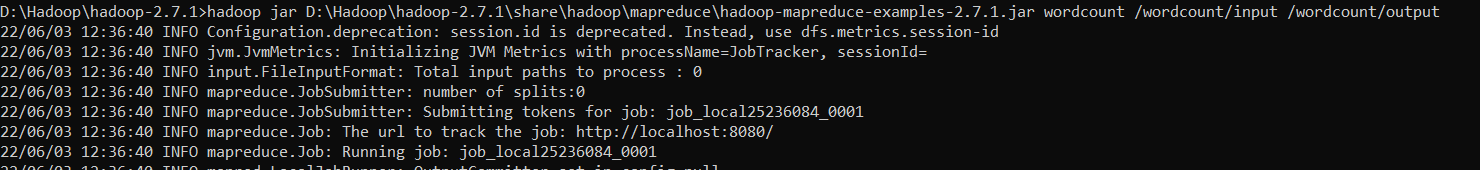
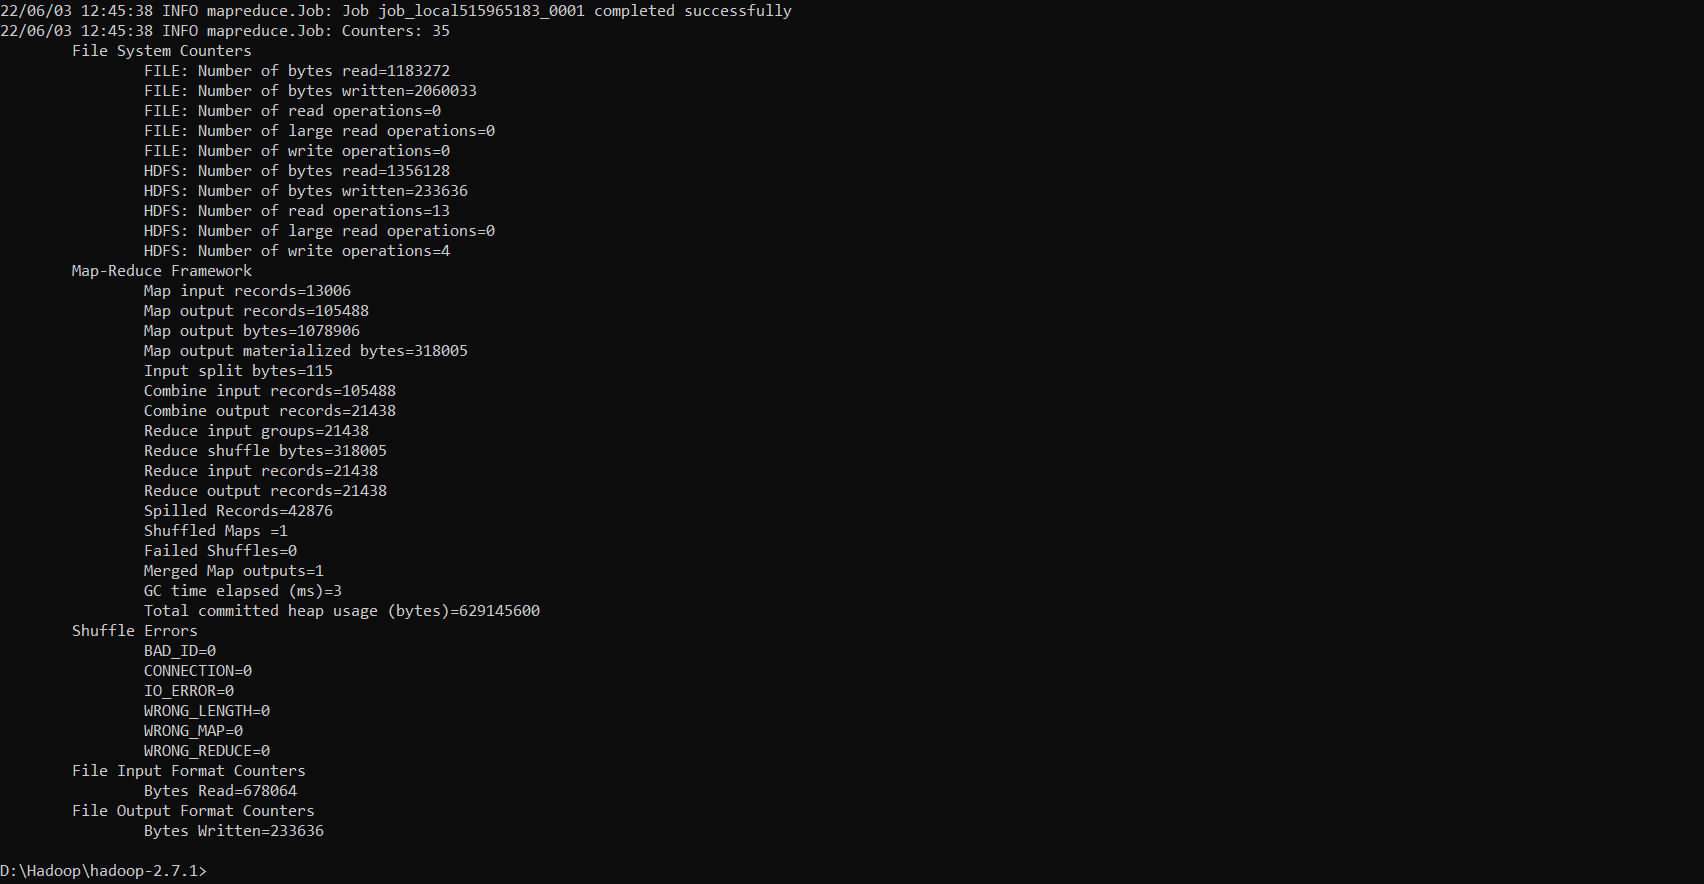
##### output file is stored in output directory of hdfs
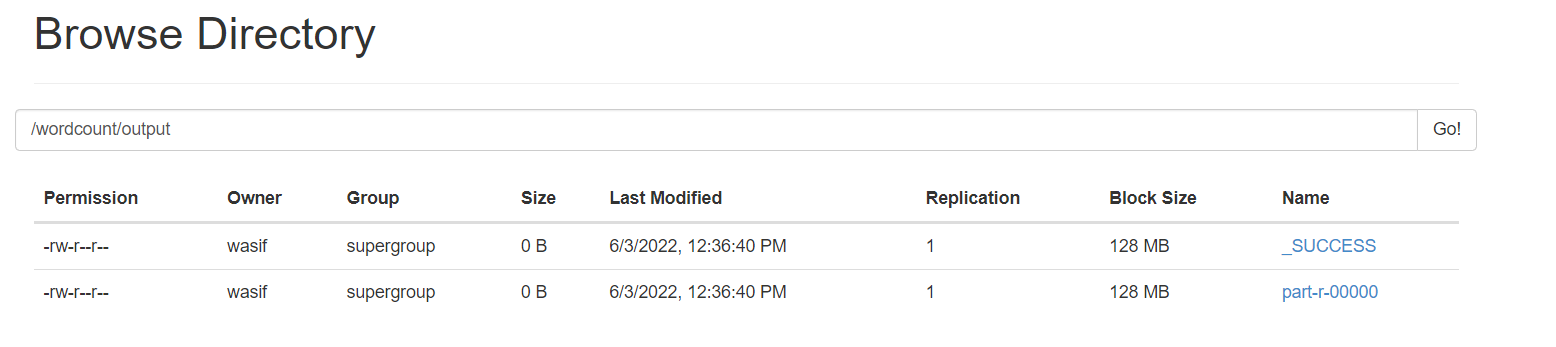
##### showing output file with 
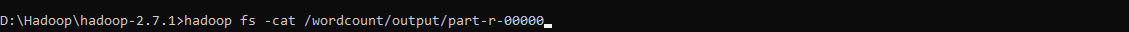
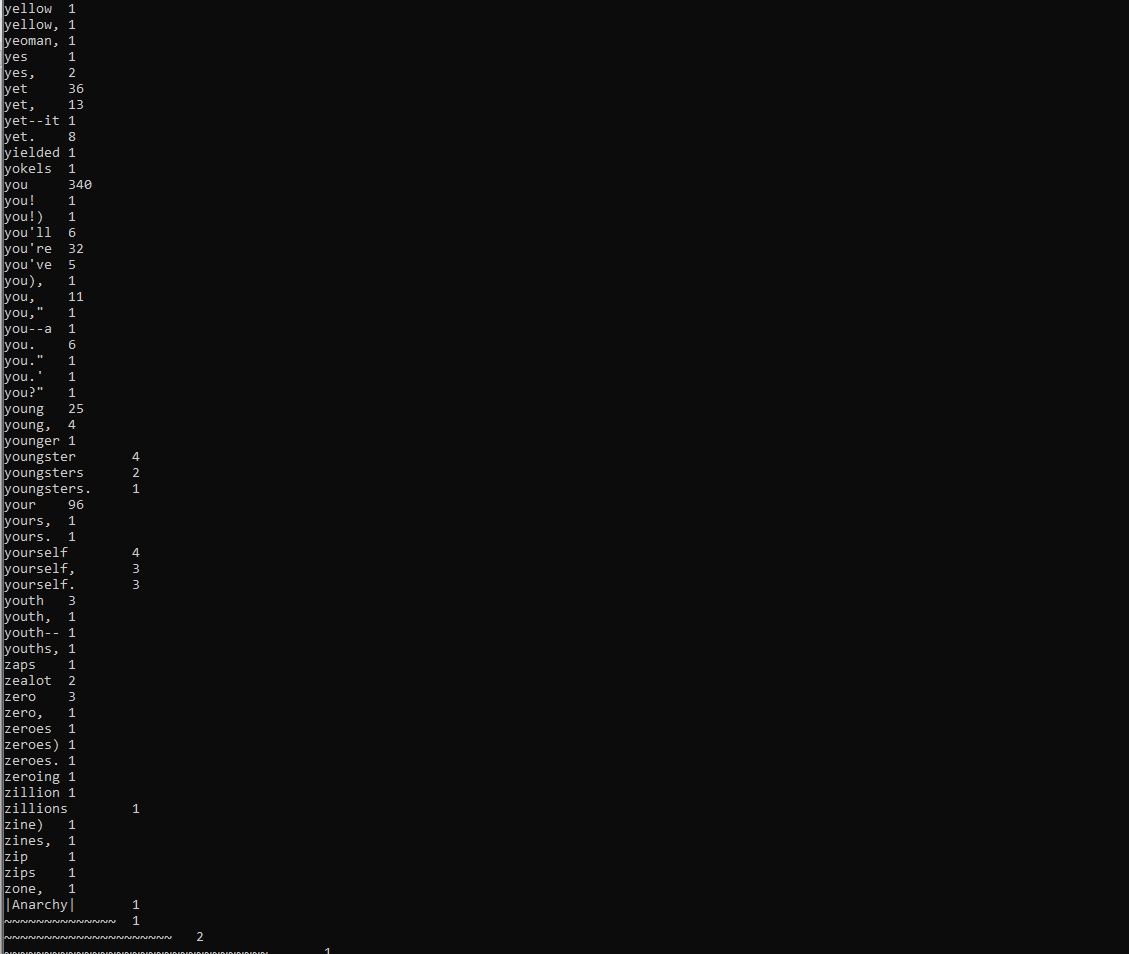

## Exercise 2: Analysis of Airport efficiency with Map Reduce
#### Creating directory on hdfs and putting input file
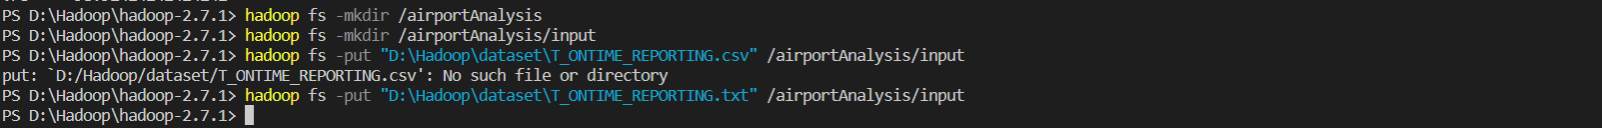

#### 1. Computing the maximum, minimum, and average departure delay for each airport

The main purpose of Mapper class is to generate key-value pair for each airport and departure delay.Reading the file through stdin and then getting columns from first row of file. Then iterating rest of the file and printing airport and corresponding delay in each line. Shuffler takes the output from the mapper and sort,group and shuffle it.This job is performed by the Hadoop and no separate python code
is needed for it.
#### mapper.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading file from standard input
file = sys.stdin 

#iterating each record of airport csv file 
for idx,rec in enumerate(file):
    
    if idx== 0: # if header row of csv
        columns = rec.strip().split( ',' )
        
        # storing index of airport column
        airport_col_index = columns.index("ORIGIN")
        
        # storing index of departure delay column
        deptDelay_col_index = columns.index("DEP_DELAY")
    else:
        # spliting each row of cvs with comma(,)
        rec = rec.strip().split( ',' )
        try:
            if str(rec[deptDelay_col_index]) != '':
                # printing airport and departure delay in each line as output of mapper
                print(rec[airport_col_index]+','+str(rec[deptDelay_col_index]))
        except Exception as e:
            pass


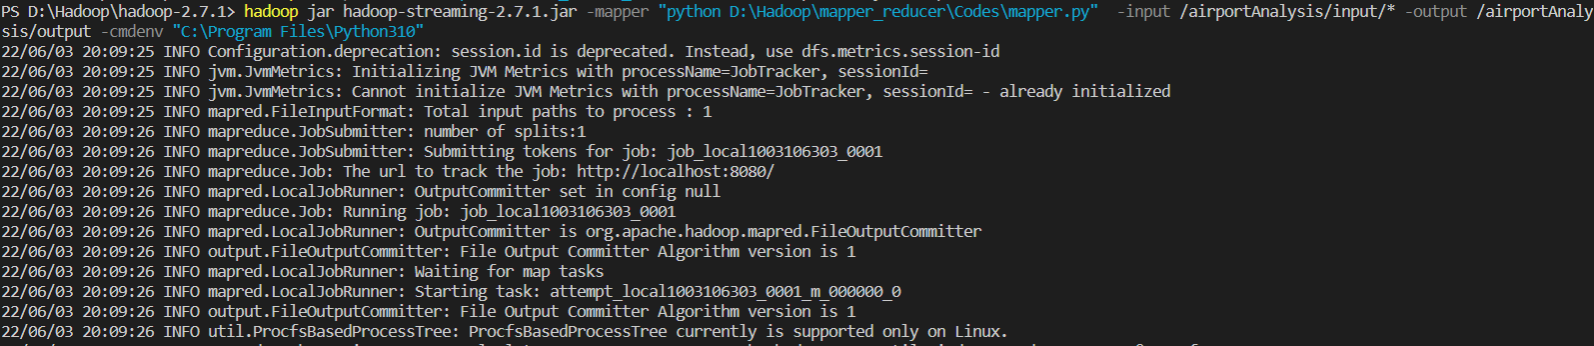

Sorted and shuffled key-pair values are stored as mapper output.

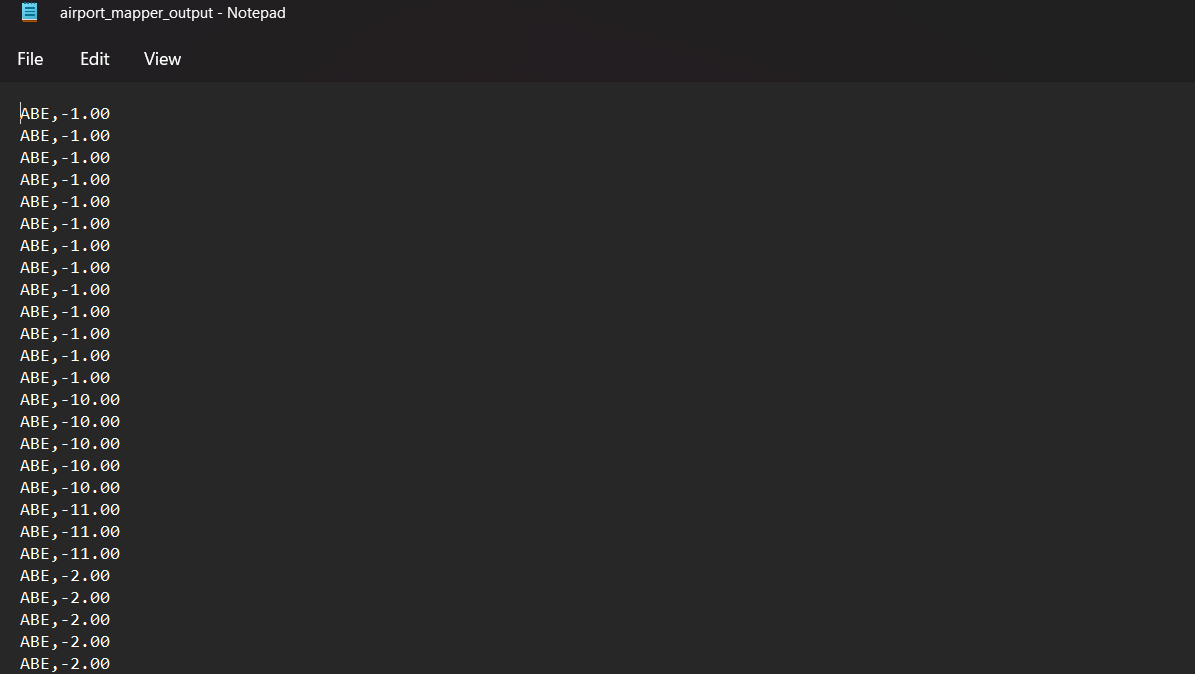

Reducers takes the sorted output from the shuffler where each airport record is togther.Sum the values of delay until new airport record starts. When new airport record start, it prints max,min and average delay of previous line airport record.
#### reducer.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading mapper output 
file = sys.stdin

previous_airport = None
sum_arr_delay = None
top_Airport = []

#iterating each line of mapper output
for line in file:

    line = line.strip()
    # split eeach line with comma and storing airport and departure delay
    airport, dept_delay = line.split(',',1)
    
    # converting delay to float
    dept_delay = float(dept_delay) 
    
    if(dept_delay>0): # checking if it is a delay of early departure ( negative values are early departure)
        
        if previous_airport != airport: # checking if new airport records starts
            if (previous_airport!=None):
                # if new airport record starts in mapper print calculations of previous airport record
                print(previous_airport +','+ str(max__dept_delay)+','+str(min_dept_delay)
                      +','+ str(sum_dept_delay/counter) )
            else:
                # for first row print header
                print('Airport,max_departure_delay,min_departure_delay,avg_departure_delay')
            counter = 1
            sum_dept_delay = dept_delay
            max__dept_delay = dept_delay
            min_dept_delay = dept_delay
            previous_airport = airport
        else: # if airport record continues in new line then just adding delay and checking for max,min
            # sum for average delay 
            sum_dept_delay += dept_delay
            # counter for dividing sum delay with total airport records
            counter += 1
            
            # checking for replacing max value
            if(max__dept_delay< dept_delay):
                max__dept_delay = dept_delay
            
            # checking for replacing min value
            if(min_dept_delay > dept_delay):
                min_dept_delay = dept_delay 
            #print('test:',airport +','+ str(max__dept_delay)+','+str(min_dept_delay) +','+ str(counter) )           
        
# printing calculations of last airport in mapper output
if previous_airport == airport:
    print(airport +','+ str(max__dept_delay)+','+str(min_dept_delay) +','+ str(sum_dept_delay/counter) )

##### runnning mapper and reducer
##### command :hadoop jar hadoop-streaming-2.7.1.jar -mapper "python D:\Hadoop\mapper_reducer\Codes\mapper.py" -reducer "python D:\Hadoop\mapper_reducer\Codes\reducer.py" -input /airportAnalysis/input/* -output /airportAnalysis/output -cmdenv "C:\Program Files\Python310"

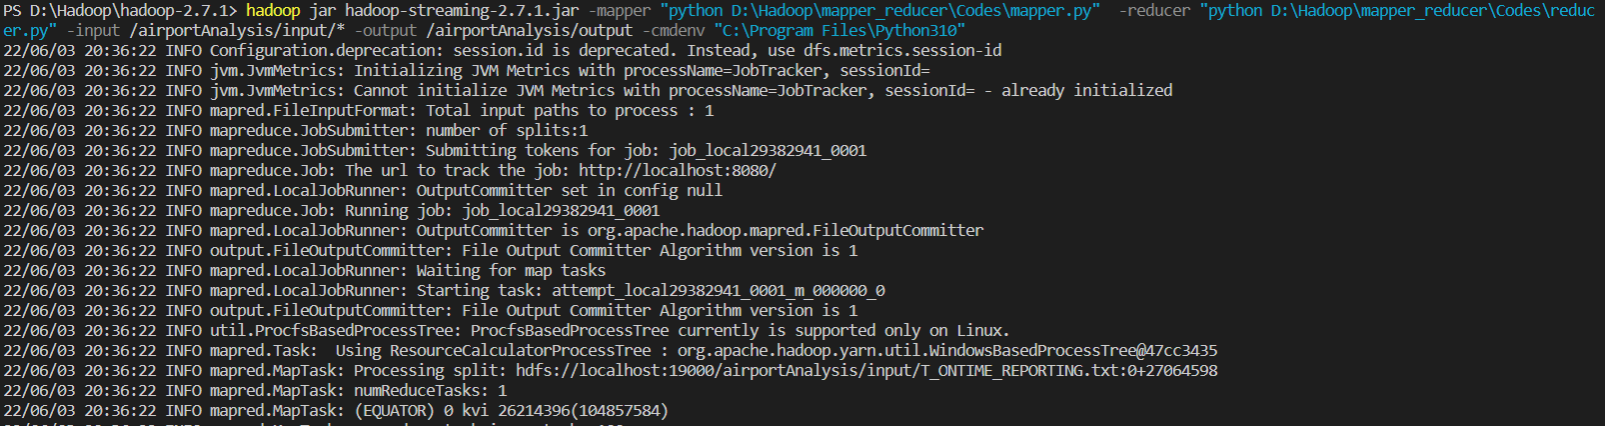
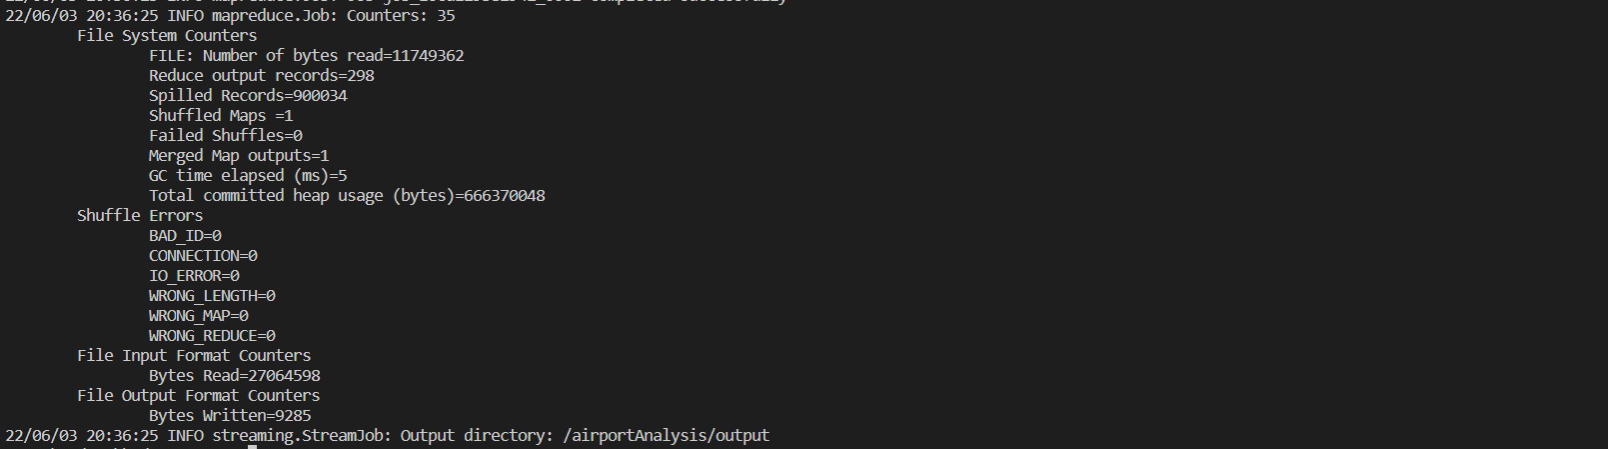

##### output file
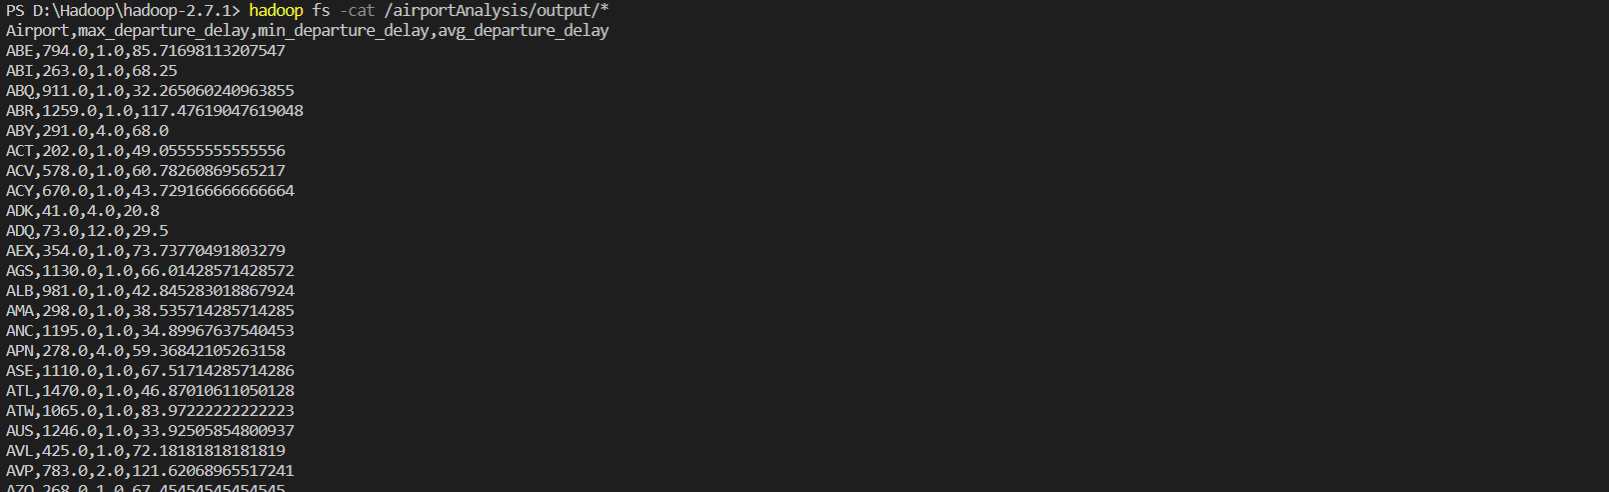

#### 2. Computing a ranking list that contains top 10 airports by their average Arrival delay.

Same as previous mapper just instead of departure delay column arrival delay column is chosen.

#### mapper.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading file from standard input
file = sys.stdin

#iterating each record of airport csv file
for idx,rec in enumerate(file):# if header row of csv
    if idx== 0:
        columns = rec.strip().split( ',' )
        
        # storing index of airport column
        airport_col_index = columns.index("ORIGIN")
        
        # storing index of arrival delay column
        deptDelay_col_index = columns.index("ARR_DELAY")
    else:
        # spliting each row of cvs with comma(,)
        rec = rec.strip().split( ',' )
        try:
            if str(rec[deptDelay_col_index]) != '':
            # printing airport and arrival delay in each line as output of mapper
                print(rec[airport_col_index]+','+str(rec[deptDelay_col_index]))
  
        except Exception as e:
            pass


Reducers takes the sorted output from the shuffler where each airport record is togther.Sum the values of delay until new airport record starts. When new airport record start, it appends airport and its average arrival into list.When all line are read, it sorts the list in increasing order and print ranked airport with best average arrival delays.
#### reducer.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading mapper output 
file = sys.stdin

previous_airport = None
sum_arr_delay = None
top_Airport = []

#iterating each line of mapper output
for line in file:

    line = line.strip()
    # split eeach line with comma and storing airport and departure delay
    airport, arr_delay = line.split(',',1)
    
    # converting delay to float
    arr_delay = float(arr_delay) 
    if(arr_delay>0): # checking if it is a delay of early departure ( negative values are early departure)
        if previous_airport != airport:
            if (previous_airport!=None):
                # if new airport record starts in mapper append calculations of previous airport record to list
                top_Airport.append((previous_airport,sum_arr_delay/counter))
            counter = 1
            sum_arr_delay = arr_delay
            previous_airport = airport
        else: # if airport record continues in new line then just adding delay
            # sum for average delay 
            sum_arr_delay += arr_delay
            # counter for dividing sum delay with total airport records
            counter += 1         
        
# appending calculations of last airport in mapper output
if previous_airport == airport:
    top_Airport.append((previous_airport,sum_arr_delay/counter))
# sorting with arrival delay ascending order    
sortedAirportList = sorted(top_Airport, key=lambda tuple: tuple[1], reverse=False)

# printing first 10 rows of list 
for i in range(0, 10):
    print('rank ',i+1, sortedAirportList[i][0], sortedAirportList[i][1])


##### runnning mapper and reducer
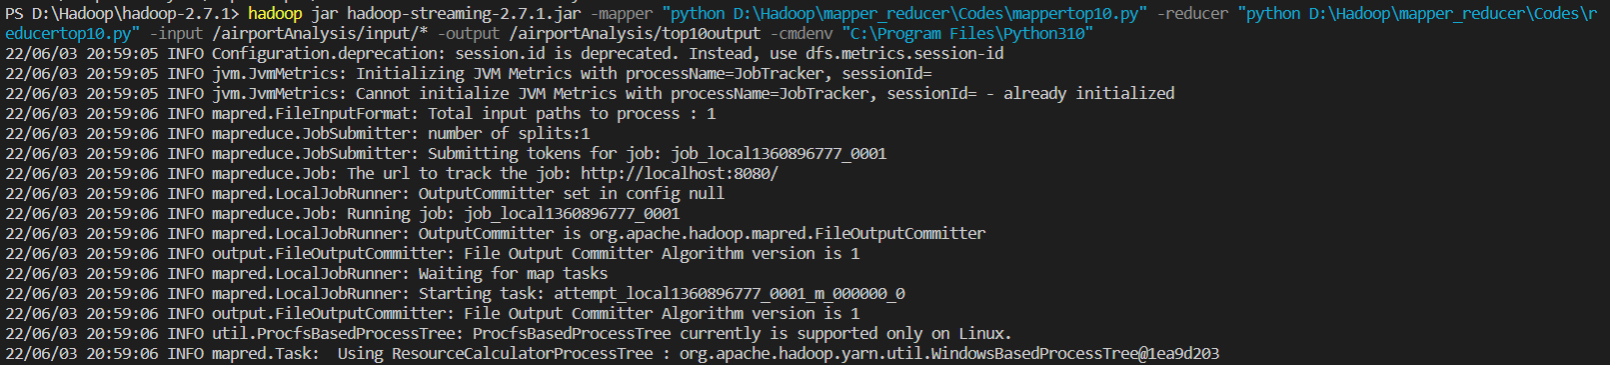
##### output file of ranks

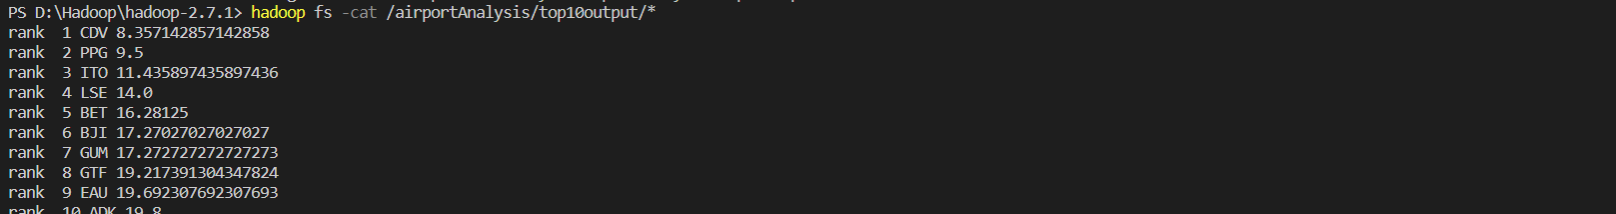

### Exercise 3: Analysis of Movie dataset using Map and Reduce

In [118]:
import pandas as pd
columns = ['MovieID','Title','Genres']
moviesDf = pd.read_csv('mergedData.txt',sep= ',')

#### Preprocessing Data
Merging movie and rating dataframes and writing to text file

In [ ]:
import pandas as pd
columns = ['MovieID','Title','Genres']
moviesDf = pd.read_csv('movies.dat',sep= '::',names = columns,header=None)

columns = ['UserID','MovieID','Rating','Timestamp']
ratingsDf = pd.read_csv('ratings.dat',sep= '::',names = columns,header=None)

mergeDataframe = pd.merge(ratingsDf, moviesDf, on="MovieID")
mergeDataframe.to_csv('mergedData.txt',sep=str(';') ,index=False,encoding='utf-8')


In [122]:
mergeDataframe

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,139,122,3.0,974302621,Boomerang (1992),Comedy|Romance
2,149,122,2.5,1112342322,Boomerang (1992),Comedy|Romance
3,182,122,3.0,943458784,Boomerang (1992),Comedy|Romance
4,215,122,4.5,1102493547,Boomerang (1992),Comedy|Romance
...,...,...,...,...,...,...
10000049,67385,63481,3.5,1227499991,Soul Men (2008),Comedy|Musical
10000050,67542,63481,3.0,1227739303,Soul Men (2008),Comedy|Musical
10000051,67385,64652,2.0,1230900023,Delgo (2008),Adventure|Animation|Comedy|Fantasy|Romance
10000052,69135,64427,4.0,1229529033,Much Ado About Something (2001),Documentary


#### Creating directories and putting mergedData.txt on hdfs
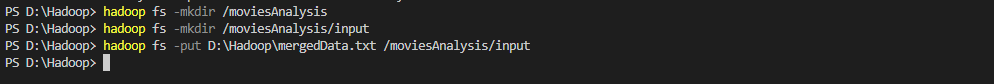

## 1. Find the movie title which has the maximum average rating?
### mapper.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading file from standard input
file = sys.stdin 


#iterating each record of movie csv file 
for idx,rec in enumerate(file):
    
    
    if idx== 0: # if header row of csv
        columns = rec.split( ';' )
    
        # storing index of movie column
        movieId_col_index = 4
        
        # storing index of ratingscolumn
        rating_col_index = 2

    else:
        # spliting each row of cvs with comma(,)
        rec = rec.strip().split( ';' )
        try:
            if str(rec[rating_col_index]) != '':
                # printing movie and ratingsin each line as output of mapper
                print(rec[movieId_col_index]+';'+str(rec[rating_col_index]))
        except Exception as e:
            pass


### reducer.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading mapper output 
file = sys.stdin

previous_movie = None
sum_rating = None
top__rated_movie = ''
max_avg_rating = 0
topMovies = []

#iterating each line of mapper output
for line in file:

    line = line.strip()
    # split eeach line with semi-colon and storing movie and  rating
    title, rating = line.split(';',1)
    
    # converting rating to float
    rating = float(rating) 
    
    if previous_movie != title:
        if (previous_movie!=None):
            # if new movie record starts in mapper calculating average and comparing with max average
            if(sum_rating/counter>max_avg_rating):
                max_avg_rating = sum_rating/counter
                top__rated_movie = previous_movie
                topMovies = []
                topMovies.append((top__rated_movie,max_avg_rating))
            elif(sum_rating/counter==max_avg_rating):
                max_avg_rating = sum_rating/counter
                top__rated_movie = previous_movie
                topMovies.append((top__rated_movie,max_avg_rating))
                            
        counter = 1
        sum_rating = rating
        previous_movie = title
        
    else: # if movie record continues in new line then just adding rating
        # sum for average rating 
        sum_rating += rating
        # counter for dividing sum rating with total movie records
        counter += 1         
        
# appending calculations of last movie in mapper output
if previous_movie == title:
    
    if(sum_rating/counter>max_avg_rating):
        max_avg_rating = sum_rating/counter
        top__rated_movie = previous_movie
print('************Movies with maximum average rating ***********')
for mov,rat in topMovies:
    print('title::',mov,', average rating::',rat)



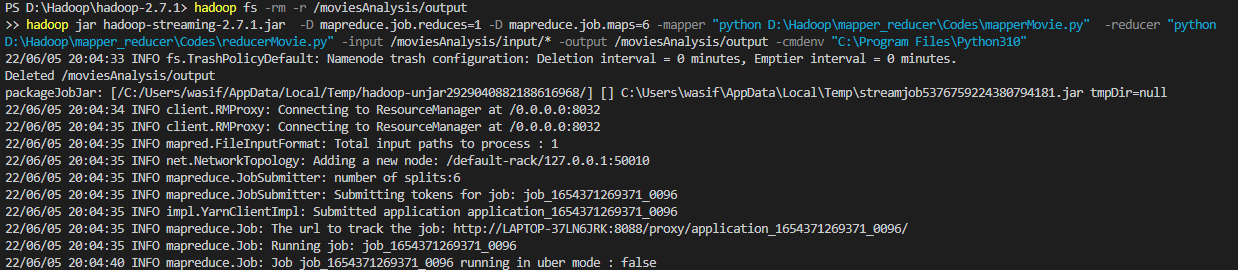
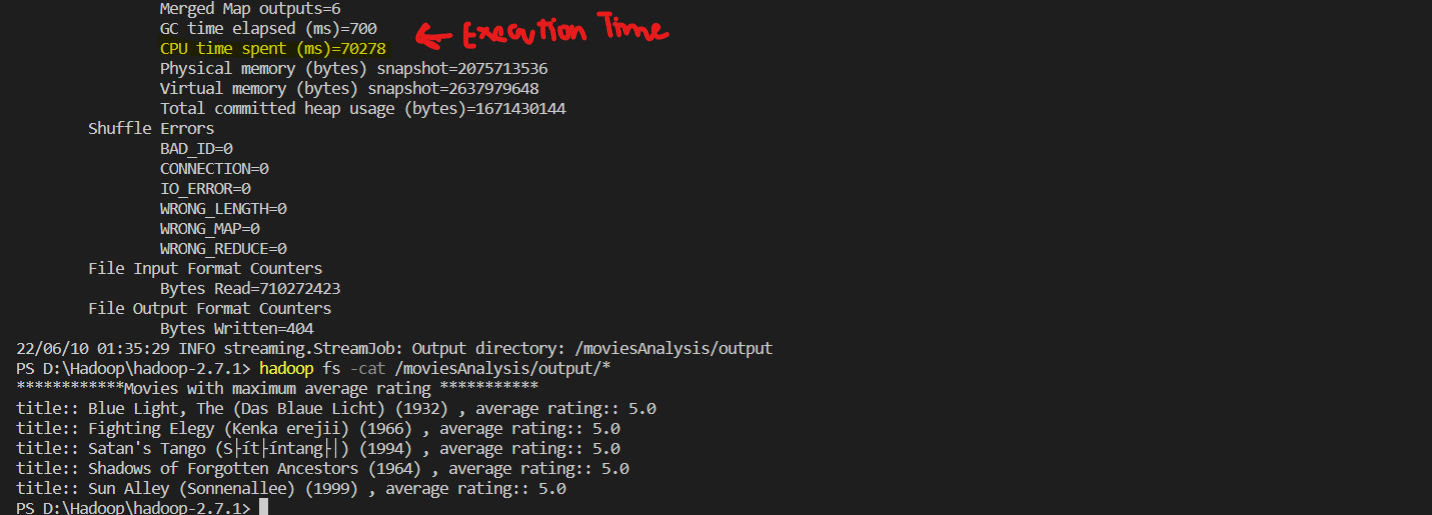

<b>Because of input file size, When I was giving mappers less then 6 it was launching mapper task more than 6.Hence, I started the expirement more than 6.</b>

In [199]:
import pandas as pd
# for each experimaent with different mappers and reducers, I noted above cpu time as execution time in below dataframe.
worker_cluster = {'mapper=6':[31445,35847,35394,39064,43422,44887,48558],
                 'mapper=8':[34707,37549,37566,40705,43625,49200,50467],
                 'mapper=10':[36721,40077,39454,44085,47233,48898,52120],
                 'mapper=12':[40781,42388,43670,45327,48480,52447,53571]}

time = pd.DataFrame.from_dict(worker_cluster, orient = 'index')
time.columns = ['reducer=1', 'reducer=2', 'reducer=4', 'reducer=6', 'reducer=8','reducer=10', 'reducer=12']
time2 = time.style.set_properties(**{
    'background-color': '#6290e0',
    'font-size': '16pt'

})
time2.background_gradient(axis=None, vmin=1, vmax=29)

,reducer=1,reducer=2,reducer=4,reducer=6,reducer=8,reducer=10,reducer=12
mapper=6,31445,35847,35394,39064,43422,44887,48558
mapper=8,34707,37549,37566,40705,43625,49200,50467
mapper=10,36721,40077,39454,44085,47233,48898,52120
mapper=12,40781,42388,43670,45327,48480,52447,53571


Text(0.5, 1.0, 'Execution time Vs Number of Mapper/Reducer')

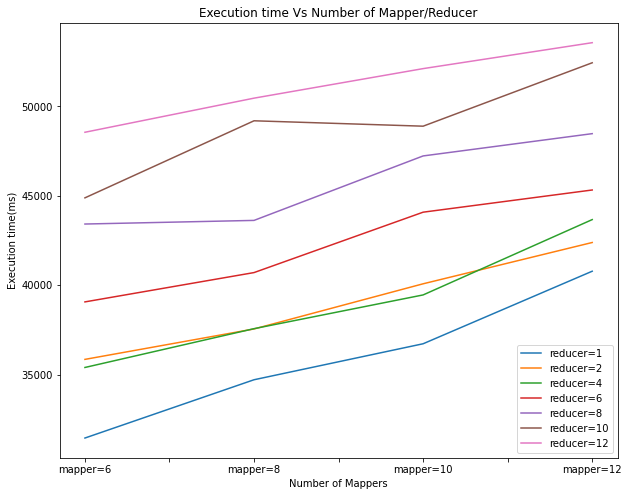

In [177]:
ax = time[['reducer=1','reducer=2','reducer=4','reducer=6','reducer=8','reducer=10','reducer=12']].plot(figsize=(10,8))
ax.set_xlabel("Number of Mappers")
ax.set_ylabel("Execution time(ms)")
ax.set_title('Execution time Vs Number of Mapper/Reducer')

In [166]:
df = pd.DataFrame({
'mapper=6':[31445,35847,35394,39064,43422,44887,48558],
                 'mapper=8':[34707,37549,37566,40705,43625,49200,50467],
                 'mapper=10':[36721,40077,39454,44085,47233,48898,52120],
                 'mapper=12':[40781,42388,43670,45327,48480,52447,53571]
   }, index=[1, 2, 4, 6, 8,10,12])

Text(0.5, 1.0, 'Execution Time Vs Number of Mappers/Reducers')

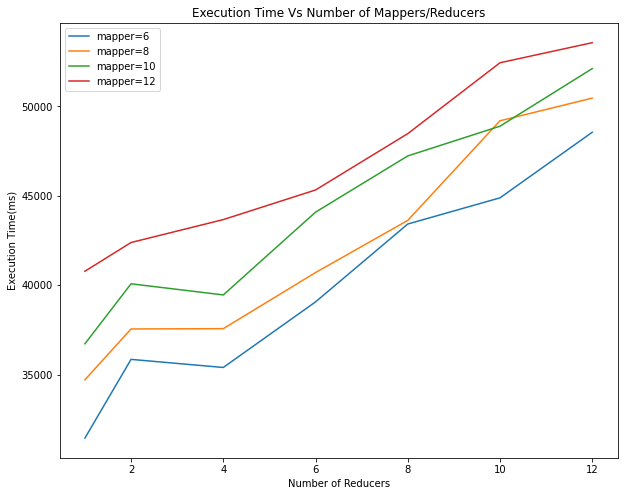

In [168]:
ax = df.plot.line(figsize=(10,8))
ax.set_xlabel("Number of Reducers")
ax.set_ylabel("Execution Time(ms)")
ax.set_title('Execution Time Vs Number of Mappers/Reducers')


## 2. Find the user who has assign lowest average rating among all the users who rated more than 40 times?
### mapperMovieUser.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading file from standard input
file = sys.stdin 


#iterating each record of movie csv file 
for idx,rec in enumerate(file):
    
    
    if idx== 0: # if header row of csv
        columns = rec.split( ';' )
    
        # storing index of movie column
        userId_col_index = 0
        
        # storing index of ratingscolumn
        rating_col_index = 2

    else:
        # spliting each row of cvs with comma(,)
        rec = rec.strip().split( ';' )
        try:
            if str(rec[rating_col_index]) != '':
                # printing movie and ratingsin each line as output of mapper
                print(rec[userId_col_index]+';'+str(rec[rating_col_index]))
        except Exception as e:
            pass

### reducer.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading mapper output 
file = sys.stdin

previous_user = None
sum_rating = None
userId = ''
lowest_avg_rating = 5

#iterating each line of mapper output
for line in file:

    line = line.strip()
    # split eeach line with semi-colon and storing users and  rating
    user, rating = line.split(';',1)
    
    # converting rating to float
    rating = float(rating)
    
    if previous_user != user:
        if (previous_user!=None):
            # if new user record starts in mapper calculating average and comparing with min average
            if(counter >40 and sum_rating/counter<lowest_avg_rating):
                lowest_avg_rating = sum_rating/counter
                userId = previous_user
            
        counter = 1
        sum_rating = rating
        previous_user = user
    else: # if users record continues in new line then just adding rating
        # sum for average rating 
        sum_rating += rating
        # counter for dividing sum rating with total user records
        counter += 1         
        
# appending calculations of last user in mapper output
if previous_user == user:
    if(counter >40 and sum_rating/counter>lowest_avg_rating):
        lowest_avg_rating = sum_rating/counter
        userId = previous_user

print('User::',userId,'lowest average rating::',lowest_avg_rating)


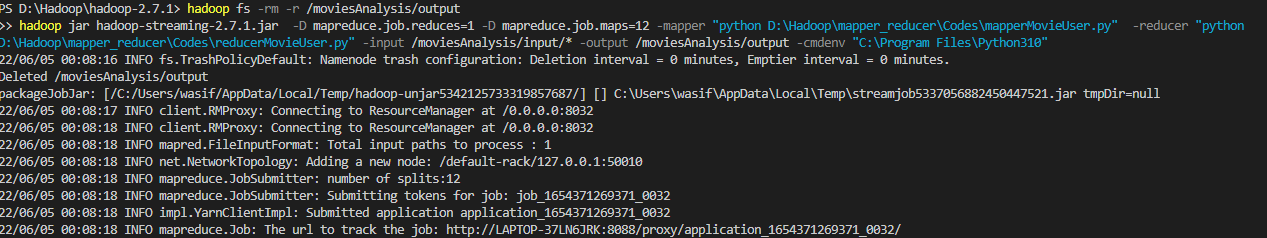
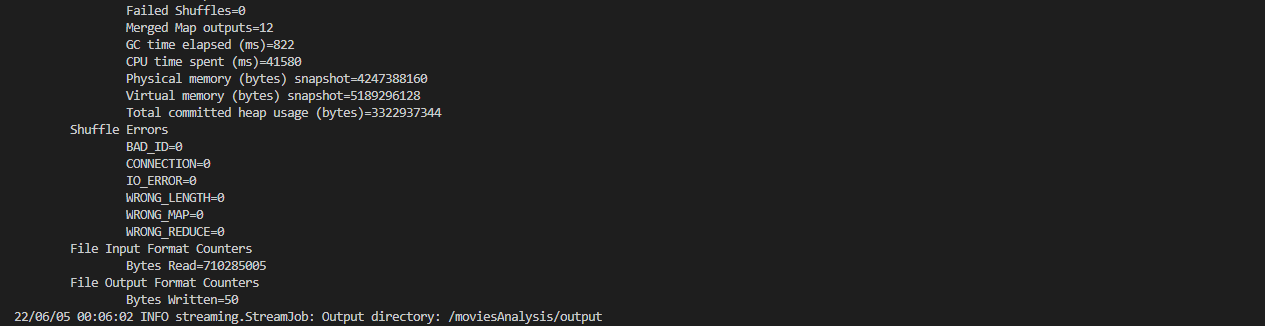
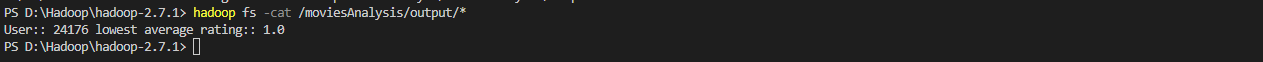

In [179]:
import pandas as pd
worker_cluster = {'mapper6':[33320,35301,33852,34846,38673,40748,42809],
                 'mapper8':[32788,38140,35065,37067,41843,43433,44277],
                 'mapper10':[35897,38970,38328,40490,43448,45229,47686],
                 'mapper12':[41559,42221,40202,44542,46224,47946,51150]}

time = pd.DataFrame.from_dict(worker_cluster, orient = 'index')
time.columns = ['reducer=1', 'reducer=2', 'reducer=4', 'reducer=6', 'reducer=8','reducer=10', 'reducer=12']
time2 = time.style.set_properties(**{
    'background-color': '#6290e0',
    'font-size': '16pt'

})
time2.background_gradient(axis=None, vmin=1, vmax=29)

,reducer=1,reducer=2,reducer=4,reducer=6,reducer=8,reducer=10,reducer=12
mapper6,33320,35301,33852,34846,38673,40748,42809
mapper8,32788,38140,35065,37067,41843,43433,44277
mapper10,35897,38970,38328,40490,43448,45229,47686
mapper12,41559,42221,40202,44542,46224,47946,51150


Text(0.5, 1.0, 'Execution time Vs Number of Mapper/Reducer')

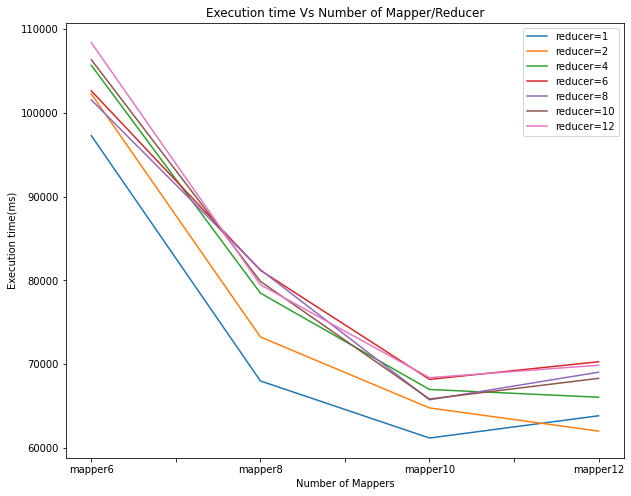

In [194]:
ax = time[['reducer=1','reducer=2','reducer=4','reducer=6','reducer=8','reducer=10','reducer=12']].plot(figsize=(10,8))
ax.set_xlabel("Number of Mappers")
ax.set_ylabel("Execution time(ms)")
ax.set_title('Execution time Vs Number of Mapper/Reducer')

In this part, due to more genre in one row mapper output is a bigger file hense with increase in number of mappers execution time decreases.

In [183]:
df = pd.DataFrame({
'mapper6':[33320,35301,33852,34846,38673,40748,42809],
                 'mapper8':[32788,38140,35065,37067,41843,43433,44277],
                 'mapper10':[35897,38970,38328,40490,43448,45229,47686],
                 'mapper12':[41559,42221,40202,44542,46224,47946,51150]
   }, index=[1, 2, 4, 6, 8,10,12])

Text(0.5, 1.0, 'Execution Time Vs Number of Mappers/Reducers')

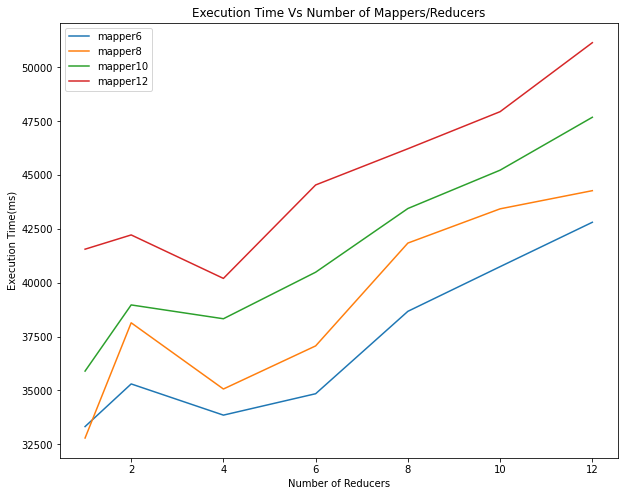

In [184]:
ax = df.plot.line(figsize=(10,8))
ax.set_xlabel("Number of Reducers")
ax.set_ylabel("Execution Time(ms)")
ax.set_title('Execution Time Vs Number of Mappers/Reducers')


## 3. Find the highest average rated movie genre?
### mapperMovieGenre.py

In [ ]:
#!/usr/bin/env python3.10
import sys
from types import GenericAlias
# reading file from standard input
file = sys.stdin 


#iterating each record of genre csv file 
for idx,rec in enumerate(file):
    
    
    if idx== 0: # if header row of csv
        columns = rec.split( ';' )
    
        # storing index of genre column
        genre_col_index = 5
        
        # storing index of ratingscolumn
        rating_col_index = 2

    else:
        # spliting each row of cvs with comma(,)
        rec = rec.strip().split( ';' )
        
        # spliting genre column to get rating for each genre
        genreList = rec[genre_col_index].split( '|' )
        for genre in genreList:
            try:
                if str(rec[rating_col_index]) != '':
                    # printing movie and ratingsin each line as output of mapper
                    print(rec[genre_col_index]+';'+str(rec[rating_col_index]))
            except Exception as e:
                pass


### reducerMovieGenre.py

In [ ]:
#!/usr/bin/env python3.10
import sys
# reading mapper output 
file = sys.stdin

previous_genre = None
sum_rating = None
top__rated_genre = ''
max_avg_rating = 0

#iterating each line of mapper output
for line in file:

    line = line.strip()
    # split eeach line with semi-colon and storing genre and  rating
    title, rating = line.split(';',1)
    
    # converting rating to float
    rating = float(rating)
    
    if previous_genre != title:
        if (previous_genre!=None):
            # if new genre record starts in mapper calculating average and comparing with max average
            if(sum_rating/counter>max_avg_rating):
                max_avg_rating = sum_rating/counter
                top__rated_genre = previous_genre
            
        counter = 1
        sum_rating = rating
        previous_genre = title
    else: # if genre record continues in new line then just adding rating
        # sum for average rating 
        sum_rating += rating
        # counter for dividing sum rating with total genre records
        counter += 1         
        
# appending calculations of last genre in mapper output
if previous_genre == title:
    if(sum_rating/counter>max_avg_rating):
        max_avg_rating = sum_rating/counter
        top__rated_genre = previous_genre
print('*********highest average rated movie genre*****************')
print('Genre::',top__rated_genre,' Average rating::',max_avg_rating)



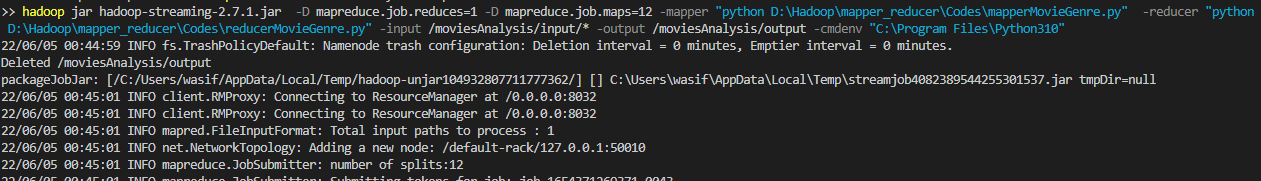
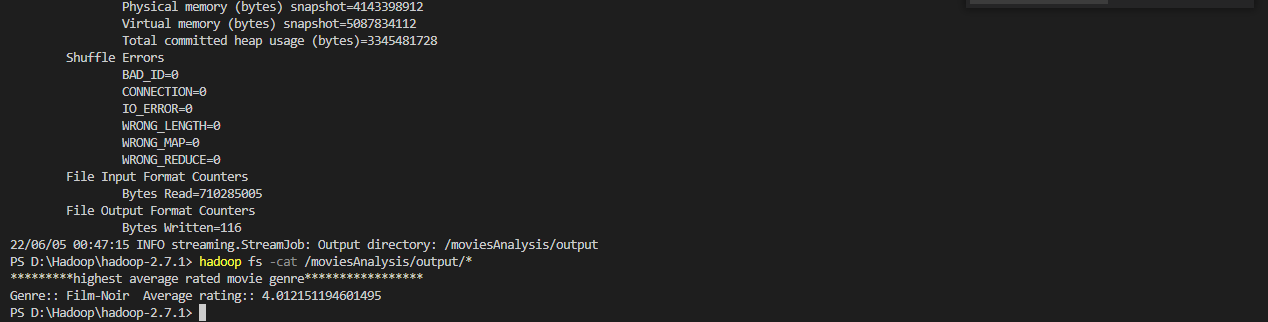

In [195]:
import pandas as pd
worker_cluster = {'mapper=6':[97273,102253,105661,102613,101533,106330,108363],
                 'mapper=8':[67998,73244,78478,81198,81273,79882,79480],
                 'mapper=10':[61185,64777,66980,68183,65745,65839,68384],
                 'mapper=12':[63842,62011,66055,70288,69041,68306,69878]}

time = pd.DataFrame.from_dict(worker_cluster, orient = 'index')
time.columns = ['reducer=1', 'reducer=2', 'reducer=4', 'reducer=6', 'reducer=8','reducer=10', 'reducer=12']
time2 = time.style.set_properties(**{
    'background-color': '#6290e0',
    'font-size': '16pt'

})
time2.background_gradient(axis=None, vmin=1, vmax=29)

,reducer=1,reducer=2,reducer=4,reducer=6,reducer=8,reducer=10,reducer=12
mapper=6,97273,102253,105661,102613,101533,106330,108363
mapper=8,67998,73244,78478,81198,81273,79882,79480
mapper=10,61185,64777,66980,68183,65745,65839,68384
mapper=12,63842,62011,66055,70288,69041,68306,69878


Text(0.5, 1.0, 'Execution time Vs Number of Mapper/Reducer')

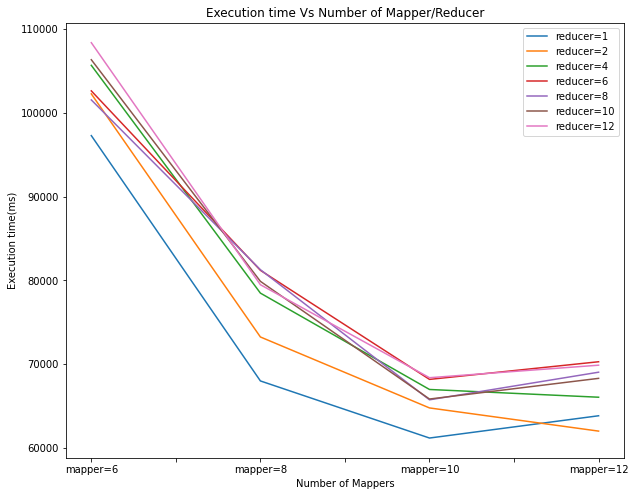

In [196]:
ax = time[['reducer=1','reducer=2','reducer=4','reducer=6','reducer=8','reducer=10','reducer=12']].plot(figsize=(10,8))
ax.set_xlabel("Number of Mappers")
ax.set_ylabel("Execution time(ms)")
ax.set_title('Execution time Vs Number of Mapper/Reducer')

In [197]:
df = pd.DataFrame({
'mapper=6':[97273,102253,105661,102613,101533,106330,108363],
                 'mapper=8':[67998,73244,78478,81198,81273,79882,79480],
                 'mapper=10':[61185,64777,66980,68183,65745,65839,68384],
                 'mapper=12':[63842,62011,66055,70288,69041,68306,69878]
   }, index=[1, 2, 4, 6, 8,10,12])

Text(0.5, 1.0, 'Execution Time Vs Number of Mappers/Reducers')

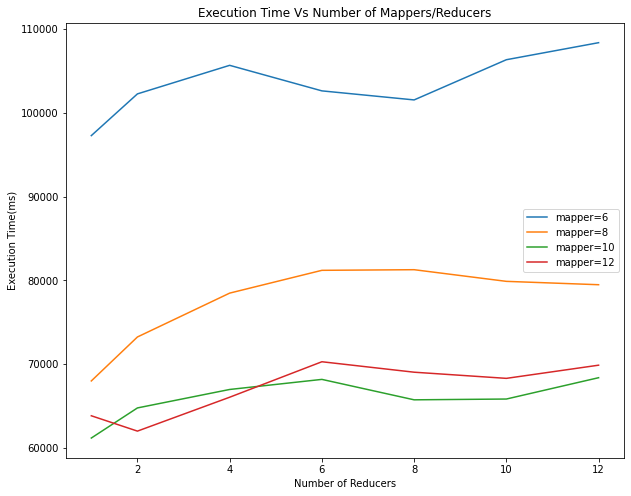

In [198]:
ax = df.plot.line(figsize=(10,8))
ax.set_xlabel("Number of Reducers")
ax.set_ylabel("Execution Time(ms)")
ax.set_title('Execution Time Vs Number of Mappers/Reducers')
